<a href="https://colab.research.google.com/github/AnIsAsPe/Aprendizaje-no-supervisado/blob/main/An%C3%A1lisis_exploratorio_con_pandas%2C_matplotlib%2C_seaborn_y_plotly.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importar bibliotecas y lectura de datos

In [2]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [77]:
titanic=pd.read_csv("https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv")

## Primera exploración de los datos

In [7]:
#Visualización de los primeros renglones del conjunto de datos
titanic.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [5]:
#Dimensiones del conjunto de datos
titanic.shape

(887, 8)

In [20]:
#Tipo de variable
titanic['Age'].dtypes

dtype('float64')

In [24]:
titanic['Survived'].value_counts()

0    0.614431
1    0.385569
Name: Survived, dtype: float64

In [6]:
#Dimensiones, Variables, Valores nulos y tipo de variables
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Survived                 887 non-null    int64  
 1   Pclass                   887 non-null    int64  
 2   Name                     887 non-null    object 
 3   Sex                      887 non-null    object 
 4   Age                      887 non-null    float64
 5   Siblings/Spouses Aboard  887 non-null    int64  
 6   Parents/Children Aboard  887 non-null    int64  
 7   Fare                     887 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 55.6+ KB


In [8]:
# Estadísticas descriptivas de las variables numéricas
titanic.describe()

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
count,887.000000,887.000000,887.000000,887.000000,887.000000,887.00000
mean,0.385569,2.305524,29.471443,0.525366,0.383315,32.30542
std,0.487004,0.836662,14.121908,1.104669,0.807466,49.78204
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.00000
25%,0.000000,2.000000,20.250000,0.000000,0.000000,7.92500
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.45420
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.13750
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.32920


In [19]:
# Estadísticas descriptivas de las variables numéricas
titanic.describe(include='object')

,Name,Sex
count,887,887
unique,887,2
top,Mr. Alexander Cairns,male
freq,1,573


In [21]:
# Conteo de valores en cada variable
for col in titanic.columns:
  print(col.upper())
  print(titanic[col].value_counts())
  print('\n')

SURVIVED
0    545
1    342
Name: Survived, dtype: int64


PCLASS
3    487
1    216
2    184
Name: Pclass, dtype: int64


NAME
Mr. Alexander Cairns                      1
Mr. Albert Augustsson                     1
Mr. Lawrence Gavey                        1
Mr. Bengt Edvin Larsson                   1
Mrs. Edwy Arthur (Ada Mary Worth) West    1
                                         ..
Mr. James Scanlan                         1
Miss. Margit Elizabeth Skoog              1
Mr. Philip Kiernan                        1
Miss. Ruth Taussig                        1
Mr. Rene Jacques Levy                     1
Name: Name, Length: 887, dtype: int64


SEX
male      573
female    314
Name: Sex, dtype: int64


AGE
22.00    39
28.00    37
18.00    36
21.00    34
24.00    34
         ..
70.50     1
36.50     1
23.50     1
55.50     1
0.42      1
Name: Age, Length: 89, dtype: int64


SIBLINGS/SPOUSES ABOARD
0    604
1    209
2     28
4     18
3     16
8      7
5      5
Name: Siblings/Spouses Aboard, 

## Distribución univariada

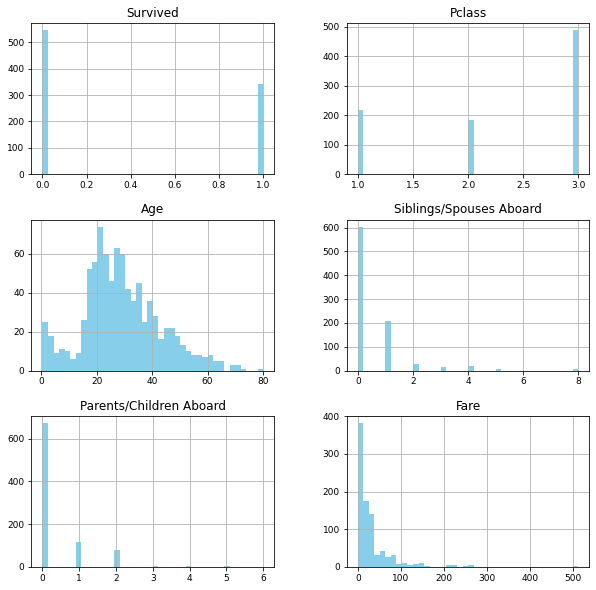

In [66]:
titanic.hist(figsize = (10,10), xlabelsize=9, ylabelsize=9,
                               color='skyblue', bins= 40)
plt.show()

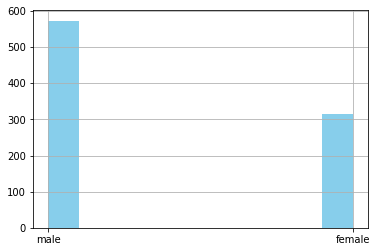

In [67]:
titanic['Sex'].hist(color='skyblue')

## Hot encoding variables categórica

In [81]:
pd.get_dummies(titanic['Sex'])

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
882,0,1
883,1,0
884,1,0
885,0,1


In [92]:
titanic['Sex'] = pd.get_dummies(titanic['Sex'], drop_first=True)
titanic = titanic.rename(columns={'Sex':'Male'})


## Correlación entre variables

In [94]:
titanic.corr()

,Survived,Pclass,Male,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
Survived,1.000000,-0.336528,-0.542152,-0.059665,-0.037082,0.080097,0.256179
Pclass,-0.336528,1.000000,0.129507,-0.391492,0.085026,0.020252,-0.548919
Male,-0.542152,0.129507,1.000000,0.091875,-0.113249,-0.244337,-0.181137
Age,-0.059665,-0.391492,0.091875,1.000000,-0.297669,-0.193741,0.112329
Siblings/Spouses Aboard,-0.037082,0.085026,-0.113249,-0.297669,1.000000,0.414244,0.158839
Parents/Children Aboard,0.080097,0.020252,-0.244337,-0.193741,0.414244,1.000000,0.215470
Fare,0.256179,-0.548919,-0.181137,0.112329,0.158839,0.215470,1.000000


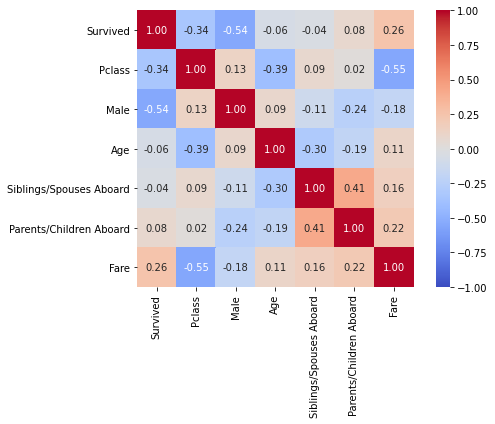

In [95]:
matriz_corr = titanic.corr()

fig = plt.figure(figsize = (8, 6))

sns.heatmap(matriz_corr, vmin = -1, vmax = 1, center = 0,
            fmt=".2f", cmap="coolwarm", annot=True, square=True)
fig.tight_layout()

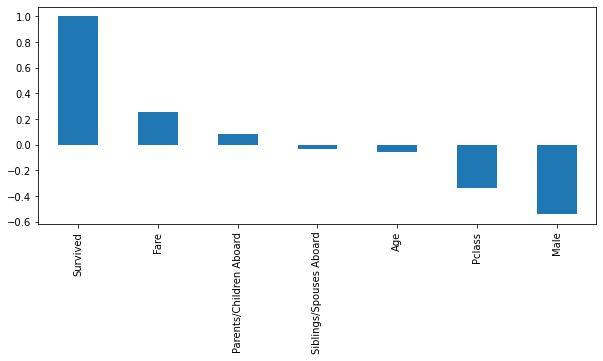

In [97]:
plt.figure(figsize = (10,4))
matriz_corr['Survived'].sort_values(ascending = False).plot(kind ='bar',)

In [119]:
list(titanic.select_dtypes(exclude=['float64', 'object']).columns)


['Survived',
 'Pclass',
 'Male',
 'Siblings/Spouses Aboard',
 'Parents/Children Aboard']

In [120]:
continuas = list(titanic.select_dtypes(include='float64').columns)
discretas = list(titanic.select_dtypes(exclude=['float64', 'object']).columns)
objetivo = ['Survived']
continuas + objetivo

['Age', 'Fare', 'Survived']

## Relación bivariada de variables continuas

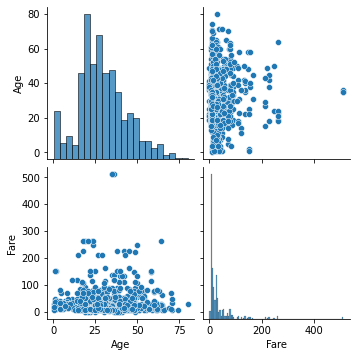

In [ ]:
sns.pairplot(titanic[continuas])
plt.show()

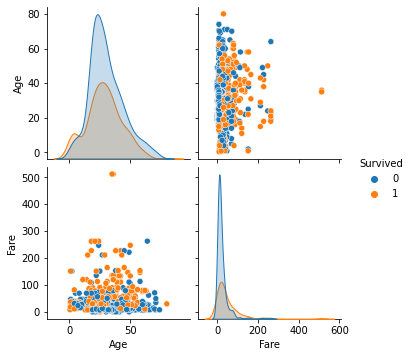

In [124]:
sns.pairplot(titanic[continuas + objetivo], hue='Survived')
plt.show()

## Relación entre bivariada entre variables discretas y continuas (o categorías)

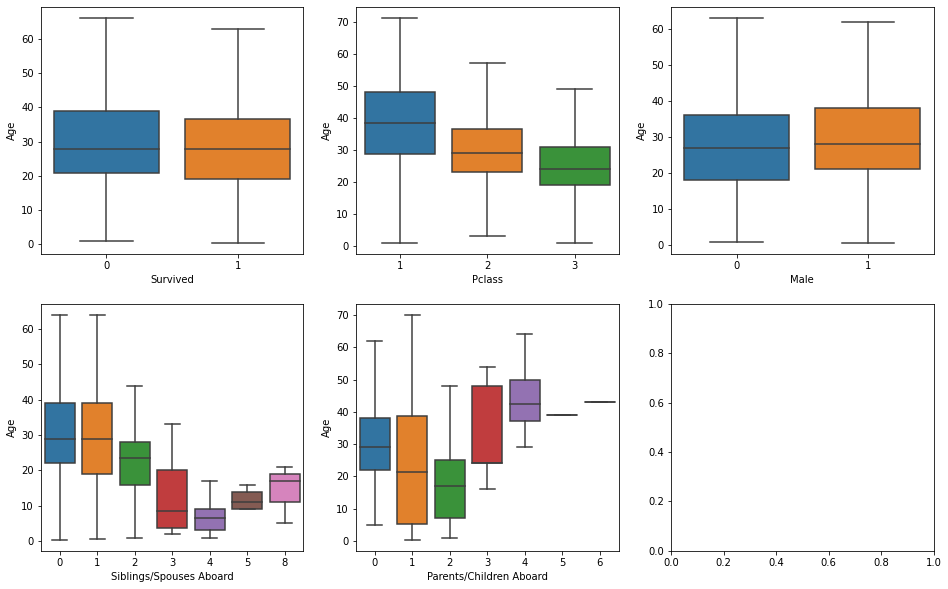

In [132]:
fig, ax = plt.subplots(2, 3, figsize=(16, 10))
for var, subplot in zip(discretas, ax.flatten()):
    sns.boxplot(x = var , y = 'Age', data = titanic,
                ax=subplot, showfliers=False )

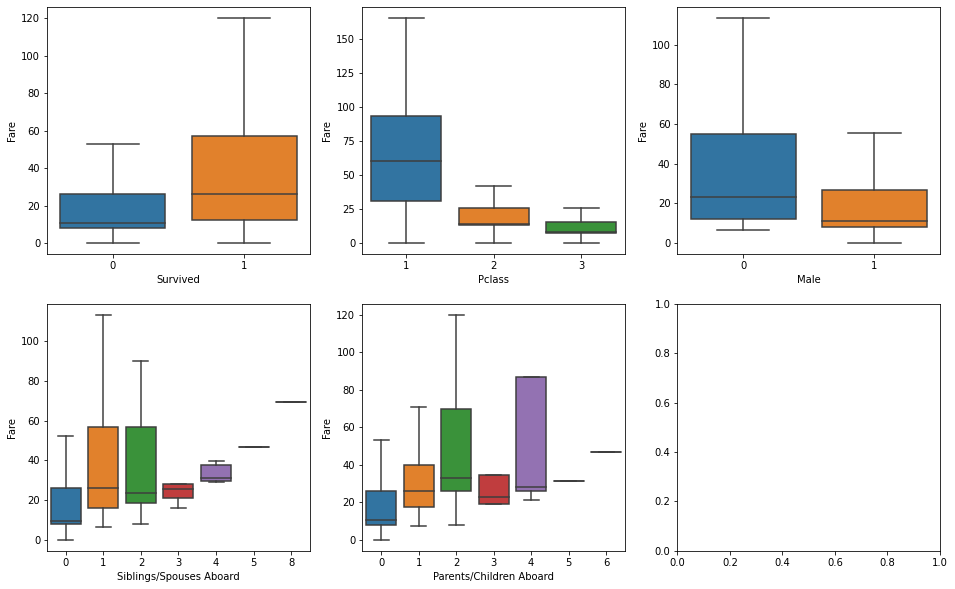

In [131]:
fig, ax = plt.subplots(2, 3, figsize=(16, 10))
for var, subplot in zip(discretas, ax.flatten()):
    sns.boxplot(x = var,y = 'Fare', data = titanic, 
                ax=subplot, showfliers=False)


## Visualización interactiva de datos en tres dimensiones

In [140]:
fig = px.scatter_3d(titanic, x='Age', y='Fare', z='Pclass',
                    color='Survived',
                    title="3D Scatter Plot")
fig.update_traces(marker=dict(size=3,),
                  selector=dict(mode='markers'))

fig.show()